#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [482]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [483]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [484]:
df.duplicated().any()

True

In [485]:
# remove duplicate data
df.drop_duplicates(inplace=True)

Periksa apakah ada missing values

In [486]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

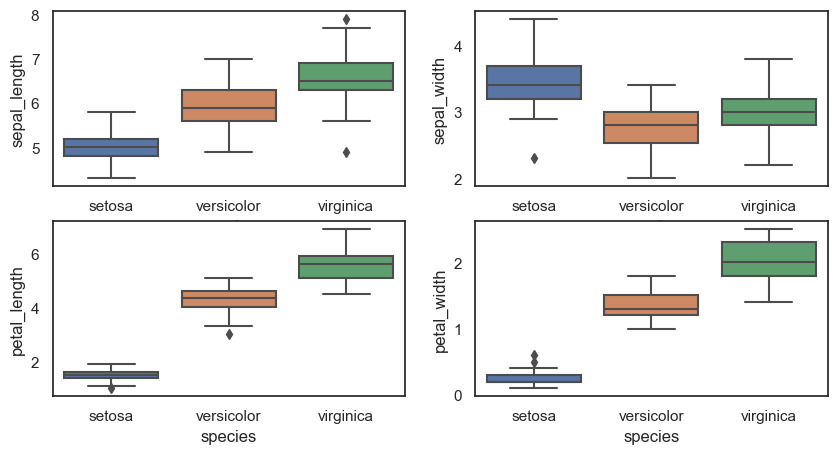

In [487]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
for boxplot in df.columns[:4]:
    plt.subplot(2, 2, df.columns.get_loc(boxplot) + 1)
    sns.boxplot(x='species', y=boxplot, data=df)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [488]:
X = df.drop('species', axis=1) 
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=421)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [556]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [557]:
model = LogisticRegression(random_state=0)
print(model)

LogisticRegression(random_state=0)


Uji model dengan dataset test

In [558]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


In [559]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix")
print(cm)
print("Accuracy:", accuracy)


Confusion Matrix
[[5 0 0]
 [0 5 0]
 [0 1 4]]
Accuracy: 0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [560]:
model = GaussianNB()
print(model)

GaussianNB()


Uji hasil model dengan data test

In [561]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [562]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix")
print(cm)
print("Accuracy:", accuracy)

Confusion Matrix
[[5 0 0]
 [0 5 0]
 [0 1 4]]
Accuracy: 0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [563]:
model = KNeighborsClassifier(metric='euclidean')
print(model)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [564]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [565]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix")
print(cm)
print("Accuracy:", accuracy)

Confusion Matrix
[[5 0 0]
 [0 5 0]
 [0 1 4]]
Accuracy: 0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah Ketiganya memiliki akurasi yang sama